In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import PCA, FastICA

# ICA

## Zad.

Wygeneruj dwa sygnały.

In [2]:
# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(20 * time)  # Signal 1 : sinusoidal signal
s2 = signal.sawtooth(2 * np.pi * time)  # Signal 2 : square signal

S = np.c_[s1, s2]

<Figure size 432x288 with 0 Axes>

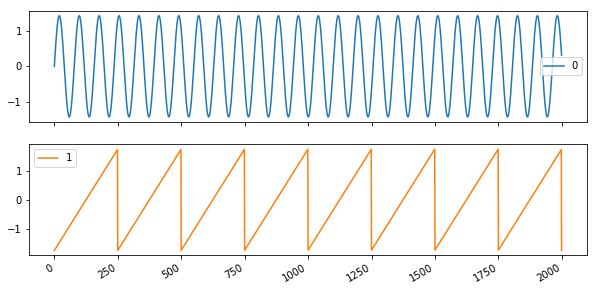

In [3]:
S /= S.std(axis=0)  # Standardize data

plt.figure()
df = pd.DataFrame(S)
df.plot(subplots=True, figsize=(10, 5));
plt.show()

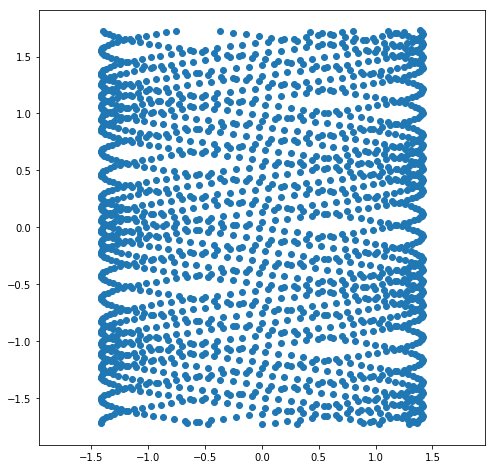

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(S[:, 0], S[:, 1])
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.axis('equal')
plt.show()

# Zad 

dokonaj mieszania sygnałów.

In [5]:
# Mix data
A = np.array([[0.2, -0.1], [0.5, 2]])  # Mixing matrix
A

array([[ 0.2, -0.1],
       [ 0.5,  2. ]])

# Zad
Narysuj sygnały po odmieszaniu.

<Figure size 432x288 with 0 Axes>

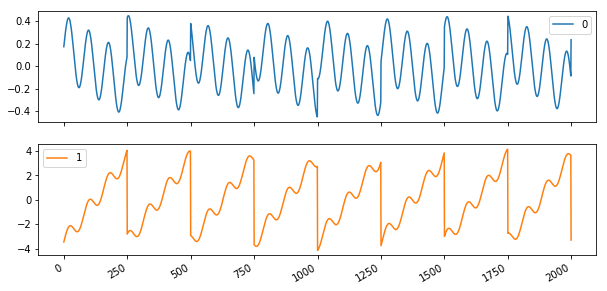

In [6]:
X = np.dot(S, A.T)  # Generate observations

plt.figure()
df = pd.DataFrame(X)
df.plot(subplots=True, figsize=(10, 5));
plt.show()

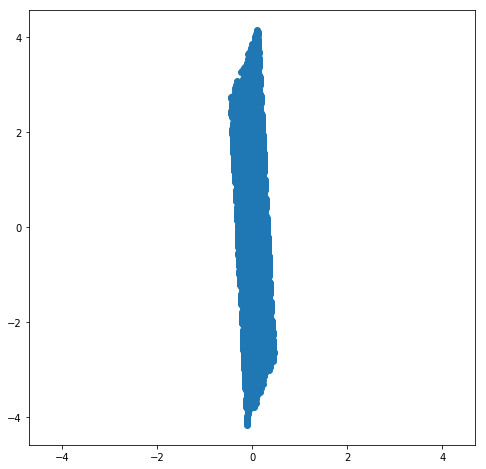

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.axis('equal')
plt.show()

# Zad
Wykonaj algorytm PCA i wizualizuj bazę (komponenty)


In [8]:
pca = PCA()
S_pca_ = pca.fit(X).transform(X)

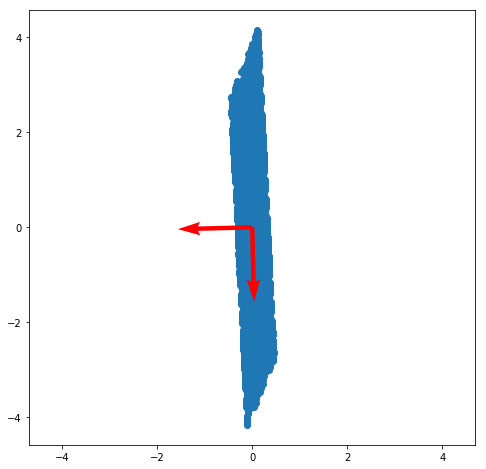

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])
x_axis, y_axis = pca.components_.T
plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color="r")

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.axis('equal')
plt.show()


# Zad
Wykonaj algorytm PCA i wizualizuj bazę (komponenty)
```python
ica = FastICA()
S_ica_ = ica.fit(X).transform(X)

ica.mixing_
```

In [10]:
ica = FastICA(random_state=1)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

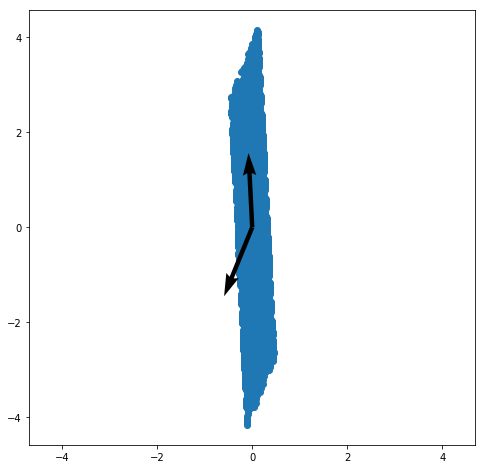

In [11]:
from numpy import linalg as LA
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])

x_axis, y_axis = ica.mixing_/LA.norm(ica.mixing_, axis=0)
plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color="k")

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.axis('equal')
plt.show()

# Zad.
 * wygeneruj dwa sygnały 
 * dokonaj mieszania
 * wykonaj algorytm FastICA
 * narysuj:
     
     * sygnały oryginalne
     * sygnały po zmieniszani
     * sygnały po odmieszaniu
 

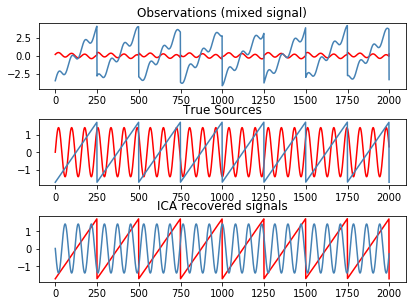

In [139]:
# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_ica_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# Zad.
Wykonaj analogiczne zadanie na sygnałach z szumem
 

In [140]:
# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal


S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise


<Figure size 432x288 with 0 Axes>

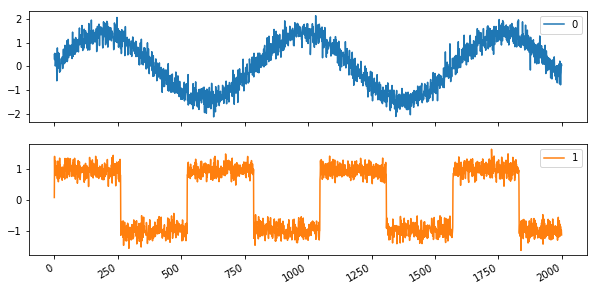

In [141]:
S /= S.std(axis=0)  # Standardize data

plt.figure()
df = pd.DataFrame(S)
df.plot(subplots=True, figsize=(10, 5));
plt.show()